# Análisis de Componentes Principales (PCA)

## Proyeccion de un vector

![](https://i.imgur.com/fWybAdV.png)

Videos explicativos sobre PCA. muy firmes! extremadamente firmes!

https://www.youtube.com/watch?v=FgakZw6K1QQ&ab_channel=StatQuestwithJoshStarmer

https://www.youtube.com/watch?v=AniiwysJ-2Y&ab_channel=LuisSerrano

## Varianza en una dirección arbitraria

Podemos hablar de la varianza a lo largo de una cierta dirección en un conjunto de datos. Hay una dirección en la que se captura mejor la varianza de los datos.

al escogerse una dirección específica se busca que la longitud de la proyección de ese vector sobre los datos sea máxima. En esa dirección se captura mayor varianza.

![](https://i.imgur.com/RoSOlGi.png)

Covarianza asociada a la dirección de movimiento que estoy tomando

$$ var(\vec{v}\cdot\vec{x_1}, \vec{v}\cdot\vec{x_2}, ... ,\vec{v}\cdot\vec{x_n}) = \vec{v}^T \sum \vec{v}  $$

En este caso el vector *v* hace referencia a dicha dirección escogida, que podría ser el vector PC1 de la imagen y *x1* hace referencia al vector del primer dato.

La matriz de covarianza $$ \sum $$ es:

![](https://i.imgur.com/FDMubo9.png)

que se arma con los valores y vectores propios.

Los valores y vectores propios caracterizan completamente la varianza de un conjunto de datos en términos de los componentes principales. Los componentes principales son los vectores propios.

*Esto no es regresión lineal*, regresión lineal es cuando se predice una variable basado en otra. Regresión lineal ocurre cuando una variable depende de la otra. En este caso no quremos predecir, queremos encontrar una correlación.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


iris = sns.load_dataset('iris')

scaler = StandardScaler()
scaled = scaler.fit_transform(
    iris[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
    )

covariance_matrix = np.cov(scaled.T)
covariance_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

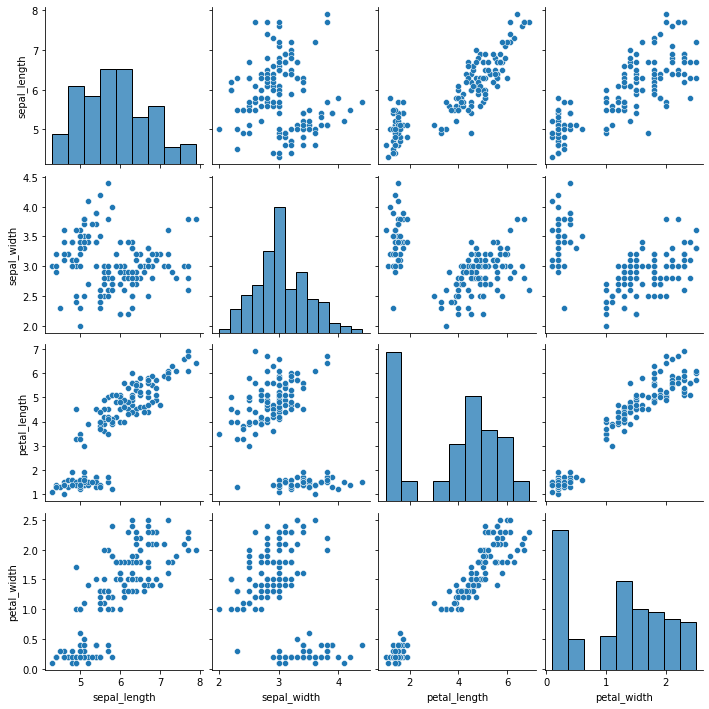

In [ ]:
sns.pairplot(iris)

Es importante estandarizar el dataset antes del PCA porque los datos deben estar centrados con promedio 0 y desviación estandar 1.

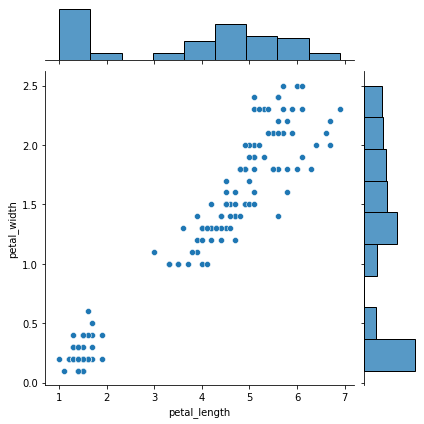

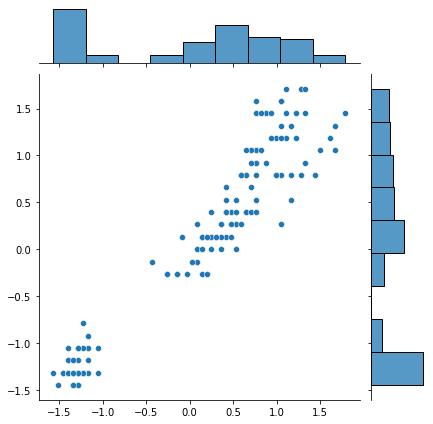

In [ ]:
sns.jointplot(x= iris['petal_length'], y=iris['petal_width'])
sns.jointplot(x = scaled[:, 2], y = scaled[:,3])

## Descomposicion en vectores y valores propios: 

https://numpy.org/doc/stable/reference/generated/numpy.linalg.eig.html

In [ ]:
valores_propios, vectores_propios = np.linalg.eig(covariance_matrix)

In [ ]:
valores_propios

array([2.93808505, 0.9201649 , 0.14774182, 0.02085386])

In [ ]:
vectores_propios

array([[ 0.52106591, -0.37741762, -0.71956635,  0.26128628],
       [-0.26934744, -0.92329566,  0.24438178, -0.12350962],
       [ 0.5804131 , -0.02449161,  0.14212637, -0.80144925],
       [ 0.56485654, -0.06694199,  0.63427274,  0.52359713]])

Cada vector propio es una de las direcciones principales a lo largo de la cual capturamos la mayor parte de la varianza de los datos originales.

In [ ]:
iris.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

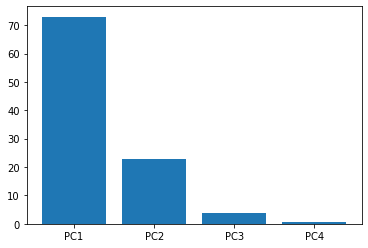

[72.9624454132999, 22.850761786701725, 3.6689218892828612, 0.5178709107154993]


In [ ]:
variance_explained = []
for x in valores_propios:
    variance_explained.append((x/sum(valores_propios))*100)

eje_x = ['PC1', 'PC2', 'PC3', 'PC4']
plt.bar(eje_x, variance_explained)
plt.show()

print(variance_explained)

## PCA con scikit : 

https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(scaled)

PCA(n_components=2)

In [ ]:
# tasa de captura de la varianza
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [ ]:
reduced_scaled = pca.transform(scaled)
# reduced_scaled

/shared-libs/python3.7/py/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


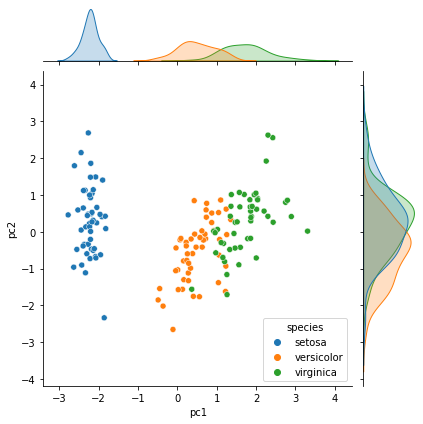

In [ ]:
iris['pc1'] = reduced_scaled[:,0]
iris['pc2'] = reduced_scaled[:,1]
# iris

sns.jointplot(iris['pc1'], iris['pc2'], hue=iris['species'])

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=b06e2ad7-2e73-4529-91c1-8e44f8b5881a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>